Importing Library and loading of the data set

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

To return all properties and methods of a specified object, without the vales

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df["target"] = iris.target

In [8]:
df[0:10]

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Training, modeling and predicition

In [9]:
X = df.drop("target", axis = "columns")
y = df.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier (n_estimators = 20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [12]:
y_test

100    2
115    2
54     1
99     1
58     1
137    2
31     0
89     1
120    2
21     0
48     0
55     1
138    2
24     0
71     1
91     1
45     0
96     1
128    2
134    2
114    2
77     1
52     1
42     0
81     1
142    2
37     0
57     1
94     1
117    2
30     0
25     0
78     1
82     1
29     0
19     0
40     0
65     1
149    2
133    2
127    2
46     0
34     0
132    2
1      0
Name: target, dtype: int32

In [13]:
X_test

,0,1,2,3
100,6.3,3.3,6.0,2.5
115,6.4,3.2,5.3,2.3
54,6.5,2.8,4.6,1.5
99,5.7,2.8,4.1,1.3
58,6.6,2.9,4.6,1.3
137,6.4,3.1,5.5,1.8
31,5.4,3.4,1.5,0.4
89,5.5,2.5,4.0,1.3
120,6.9,3.2,5.7,2.3
21,5.1,3.7,1.5,0.4


Checking for Accuracy

In [14]:
model.score(X_test, y_test)

0.9111111111111111

In [15]:
y_predicted_value = model.predict(X_test)

In [16]:
y_predicted_value 

array([2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2,
       0])

Confusion maxtrix

In [17]:
from sklearn.metrics import confusion_matrix
con_max = confusion_matrix(y_test, y_predicted_value)
con_max

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  3, 11]], dtype=int64)

Text(51.0, 0.5, 'Truth')

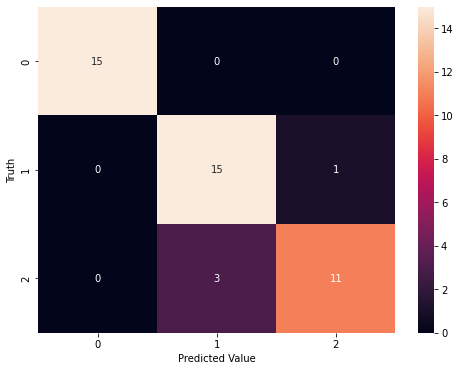

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,6))
sns.heatmap(con_max, annot = True)
plt.xlabel("Predicted Value")
plt.ylabel("Truth")